# Diagrammatic Differentiation

**Quantum Group Workshop**, _26th January 2021_

Alexis Toumi, joint work with Richie Yeung and Giovanni de Felice

## 1) Parametrised matrices

Fix a rig $(\mathbb{S}, +, \times, 0, 1)$.

**Definition:** A matrix $f \in \mathbf{Mat}_\mathbb{S}(m, n)$ is a function $f : [m] \times [n] \to \mathbb{S}$ where $[n] = \{0, \dots, n - 1\}$ for $n \in \mathbb{N}$.

**Definition:** A parametrised matrix is a function $f : \mathbb{S} \to \mathbf{Mat}_\mathbb{S}(m, n)$, or equivalently a function-valued matrix $f \in \mathbf{Mat}_{\mathbb{S} \to \mathbb{S}}(m, n)$.

**Example:**

In [1]:
from discopy import *
from sympy.abc import phi

Rz(phi).array

array([[exp(-1.0*I*pi*phi), 0],
       [0, exp(1.0*I*pi*phi)]], dtype=object)

In [2]:
(lambda phi: Rz(phi).array)(0.25)

array([[0.70710678-0.70710678j, 0.        +0.j        ],
       [0.        +0.j        , 0.70710678+0.70710678j]])

## 2) Parametrised diagrams

Fix a monoidal signature $(\Sigma_0, \Sigma_1, \text{dom}, \text{cod} : \Sigma_1 \to \Sigma_0^\star)$
for $X^\star = \coprod_{n \in \mathbb{N}} X^n$ the free monoid.

**Definition:** An _abstract_ diagram $d \in \mathbf{C}_\Sigma(s, t)$ is defined by a list of
$\text{layers}(d) = (\text{left}_0, \text{box}_0, \text{right}_0), \dots, (\text{left}_n, \text{box}_n, \text{right}_n) \in \Sigma_0^\star \times \Sigma_1 \times \Sigma_0^\star$.

**Definition:** A _concrete_ diagram is an abstract diagram with a monoidal functor $F : \mathbf{C}_\Sigma \to \mathbf{Mat}_\mathbb{S}$.

**Definition:** A _parametrised_ diagram is a function $d : \mathbb{S} \to \mathbf{C}_\Sigma(s, t)$, or equivalently, a diagram with a monoidal functor $F : \mathbf{C}_\Sigma \to \mathbf{Mat}_{\mathbb{S} \to \mathbb{S}}$.

**Example:**

f >> Id(Dim(2)) @ f >> g


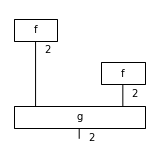

array([(phi + 1)*(1.0*phi + 1.0), 4.0*phi**2*(phi**2 + 1)], dtype=object)

In [3]:
from discopy import *

x, y, z = Dim(1), Dim(2), Dim(2)
f = tensor.Box('f', x, y, [phi + 1, -phi * 2])
g = tensor.Box('g', y @ y, z, [1, 0, 0, 0, 0, 0, 0, phi ** 2 + 1])

d = f @ f >> g
print(d)
d.draw(figsize=(2, 2))

d.eval().array

In [4]:
d.subs(phi, 0.25).eval().array

array([1.56250000000000, 0.265625000000000], dtype=object)

## 3) Product rule

We define the gradient of a parametrised matrix $f \in \mathbf{Mat}_{\mathbb{S} \to \mathbb{S}}(m, n)$ elementwise:
$$
\frac{\partial f}{\partial x}(i, j)
= \frac{\partial}{\partial x} f(i, j)
$$

Given a parametrised diagram $d, F$ we want a new diagram $\frac{\partial d}{\partial x}$ such that:
$$
F\big(\frac{\partial d}{\partial x}\big)
= \frac{\partial F(d)}{\partial x}
$$

We can do this by defining gradients as _formal sums of diagrams_ and using the product rule:
$$
\frac{\partial}{\partial x} (d \otimes d')
= \frac{\partial d}{\partial x} \otimes d'
+ d \otimes \frac{\partial d'}{\partial x}
$$
$$
\frac{\partial}{\partial x} (d \circ d')
= \frac{\partial d}{\partial x} \circ d'
+ d \circ \frac{\partial d'}{\partial x}
$$

**Example:**

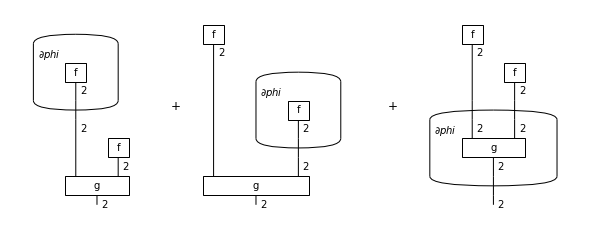

In [5]:
d.grad(phi).draw(figsize=(8, 3))

## 4) Chain rule

Given an arbitrary function $f : \mathbb{S} \to \mathbb{S}$,
we lift it to matrices by applying it elementwise.
Diagrammatically, we represent this as a _bubble_ around a subdiagram.

Gradients of bubbles are then given by the chain rule:

$$
\frac{\partial}{\partial x} f(d)
= \frac{\partial f}{\partial x} (d)
\times \frac{\partial d}{\partial x}
$$

where the elementwise product can be encoded as pre- and post-composition with spiders.

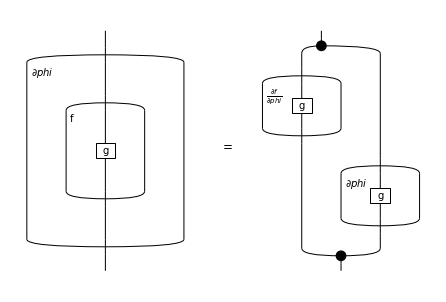

In [6]:
g = tensor.Box('g', Dim(2), Dim(2), [2 * phi, 0, 0, phi + 1])
f = lambda d: d.bubble(func=lambda x: x ** 2, drawing_name="f")
lhs, rhs = tensor.Box.grad(f(g), phi), f(g).grad(phi)
drawing.equation(lhs, rhs, draw_type_labels=False)

## 5) Applications

* Gradients of quantum circuits using the parameter shift rule.
* Gradients of neural nets and classical post-processing with bubbles.
* Gradients of circuit functors for QNLP.